In [2]:
from src.create_graphs import *
import pandas as pd
import os

# Peer Review for DATA 440 Automation & Workflows

# Introduction

My GUI app is not ready yet, but I have all of the components ready so I have created a demo here. If you want to use your own crossword data, follow the instructions at the bottom of the README. If you do not want to wait for your data to load or do not have a NYT Games account, my own data is in the "data" folder in this repository and you can use that for the graphs.

## Data

When a user first opens the app, all of their data must be loaded. src/`get_all_data.py` (when run from the command line) asks the user to input their cookie. The user is then asked what kind of puzzle data they would like to load (daily, mini, or bonus). Regardless of what kind of puzzle the user inputs, the desired start date that they want to load is asked. This is so that if someone only started solving crosswords two months ago, the app will not scrape data for the last three years and waste time. 

### Naming convention for data

The name for each of the data files all follow the same naming convention:

[puzzle type]\_[start date]\_[end date].csv

Every time data is loaded, the name of the file is updated so that the next time that the app loads new data, it knows the date of the most recent data (aka the start data of the next load). The end date will always be the previous day (ie if today is 11/22/24, and the most recent new data load was 11/17/24, the app will load 11/18/24 - 11/21/24).

In [3]:
data_files = os.listdir("data/")
data_files

['mini_20140821_20241117.csv',
 'bonus_20220101_20241104.csv',
 'daily_20220101_20241117.csv']

# Mini Puzzle

## Data

In [4]:
pd.read_csv("data/" + [file for file in data_files if file.startswith("mini")][0]).head()

,puzzle_id,seconds_spent_solving,author,editor,format_type,print_date,publish_type,title,version,percent_filled,solved,star,day
0,9360,127.0,Joel Fagliano,NaN,Normal,2014-09-01,Mini,NaN,1,100,True,NaN,Monday
1,9362,165.0,Joel Fagliano,NaN,Normal,2014-09-02,Mini,NaN,2,100,True,NaN,Tuesday
2,9363,112.0,Joel Fagliano,NaN,Normal,2014-09-03,Mini,NaN,1,100,True,NaN,Wednesday
3,9393,142.0,Joel Fagliano,NaN,Normal,2014-09-04,Mini,NaN,1,100,True,NaN,Thursday
4,9391,104.0,Joel Fagliano,NaN,Normal,2014-09-05,Mini,NaN,1,100,True,NaN,Friday


To get new data, the `daily_refresh.py` is run. The user is again prompted for their cookie, however once this is implemented into the app it will already be stored. Everytime the user opens the app, this will be done automatically. 

If a user has not opened the app in more than 60 days, a window will pop up asking if they want to refresh the data with a warning that it may take a few minutes. 

## Visualizations

This is the main visualization that I have for the mini crossword right now. Currently, there are no statistics or visualizations provided at all by NYT Games. It takes data from the past 100 mini puzzles solved, but think I will make the number of days to display a slider on the app. This visualization also excludes Saturday puzzles because they are 7x7 grids, while the rest of the week is a 5x5 grid.

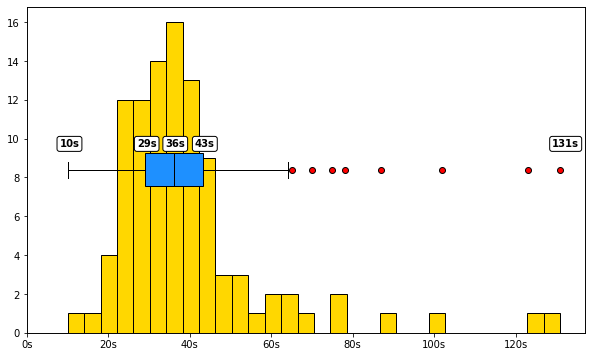

In [5]:
create_mini_hist_box()

# Daily Puzzle


## Data

In [6]:
pd.read_csv("data/" + [file for file in data_files if file.startswith("daily")][0]).head()

,puzzle_id,seconds_spent_solving,author,editor,format_type,print_date,publish_type,title,version,percent_filled,solved,star,day
0,19785,NaN,Peter Wentz,Will Shortz,Normal,2022-01-01,Daily,NaN,0,0,False,NaN,Saturday
1,19784,NaN,Paolo Pasco,Will Shortz,Normal,2022-01-02,Daily,Color Mixing,0,0,False,NaN,Sunday
2,19802,1339.0,Beth Rubin and Trent H. Evans,Will Shortz,Normal,2022-01-03,Daily,NaN,0,100,True,NaN,Monday
3,19807,1236.0,David Bukszpan,Will Shortz,Normal,2022-01-04,Daily,NaN,0,100,True,NaN,Tuesday
4,19804,NaN,Damon Gulczynski,Will Shortz,Normal,2022-01-05,Daily,NaN,0,0,False,NaN,Wednesday


## Visualizations

I created two visualizations for the daily puzzles. 

First, I made a histogram that takes a day of the week as input. It is important to note that the difficulty of NYT crosswords varies greatly throughout the week:

Monday - easiest

Tuesday - a touch harder than Monday, but still relatively easy

Wednesday - more difficult than Monday and Tuesday

Thursday - not necessarily more difficult than Wednesday in the content of the clues, but in the wordplay is more difficult

Friday - more difficult than Wednesday and Thursday

Saturday - most difficult of the week (I usually struggle with Saturdays and rarely finish them)

Sunday - Wednesday/Thursday difficulty but larger grid (21x21) than the rest of the week's puzzles (15x15)

The histogram shows the best time, average (mean) time, and the most recent time, keeping with the statistics that NYT Games provides, but providing more insight into the spread of their data.


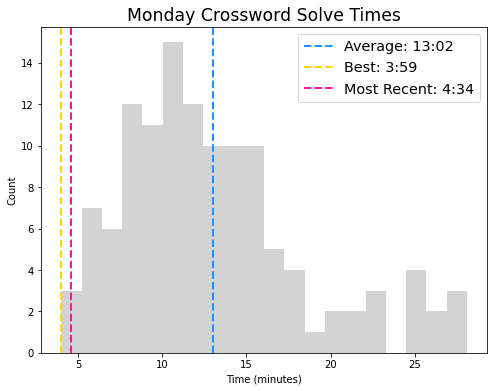

In [7]:
create_hist("Monday")

The other visualization that I have is a bar graph that compares the average time for all days of the week. One thing that I would like to add to this puzzle is the number of puzzles for each day in each bar.

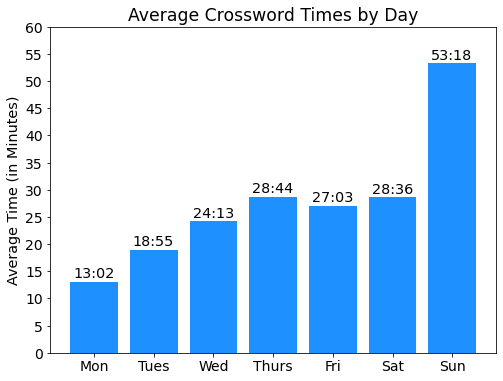

In [8]:
create_compare_ave_times()

# Bonus Puzzles

Visualizations for the Bonus puzzles are still TBD. They only come out once a month, are not available on the app, and are not solved by many users however, I do not want to neglect them. These puzzles are also strongly tied to a theme. For example, October 2024's bonus was called "Send My Regards to Broadway!" and most clues were about Broadway shows, while October 2023's bonus was called "National Homemade Cookie Day" and most of the clues were about cookies. Because of this, I am thinking about classifying puzzles with a certain categories and showing users how well they perform in different categories (arts, sports, pop culture, history, etc.). 